## Obesity Level Classification with Machine Learning:

•	Built a multiclass classification model to predict obesity levels using Logistic Regression, Random Forest, and SVM; achieved up to 96.4% accuracy after hyperparameter tuning and cross-validation.

•	Performed end-to-end pipeline including data cleaning, feature scaling, model evaluation, and optimization with GridSearchCV and 5-fold cross-validation, identifying SVM as the best-performing model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Load your dataset into a DataFrame named 'df'
df = pd.read_csv(r"C:\Users\Mouni\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape


(2111, 17)

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:

type(df)


pandas.core.frame.DataFrame

In [7]:

df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:

df.describe(include='all')


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [9]:

df.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:

df.drop_duplicates(inplace=True)


In [11]:
df1 = df[["Gender", "Age"]]


In [12]:
df['NObeyesdad'].unique()


array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [13]:
df.drop('SCC', axis=1, inplace=True)


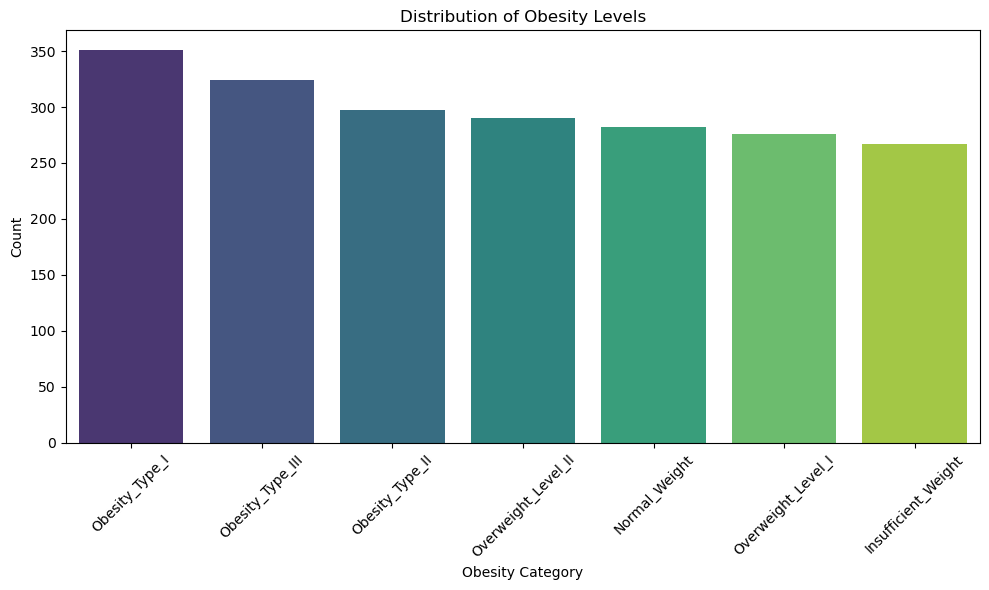

In [14]:
# Plotting the distribution of the 'NObeyesdad' category
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='viridis')
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

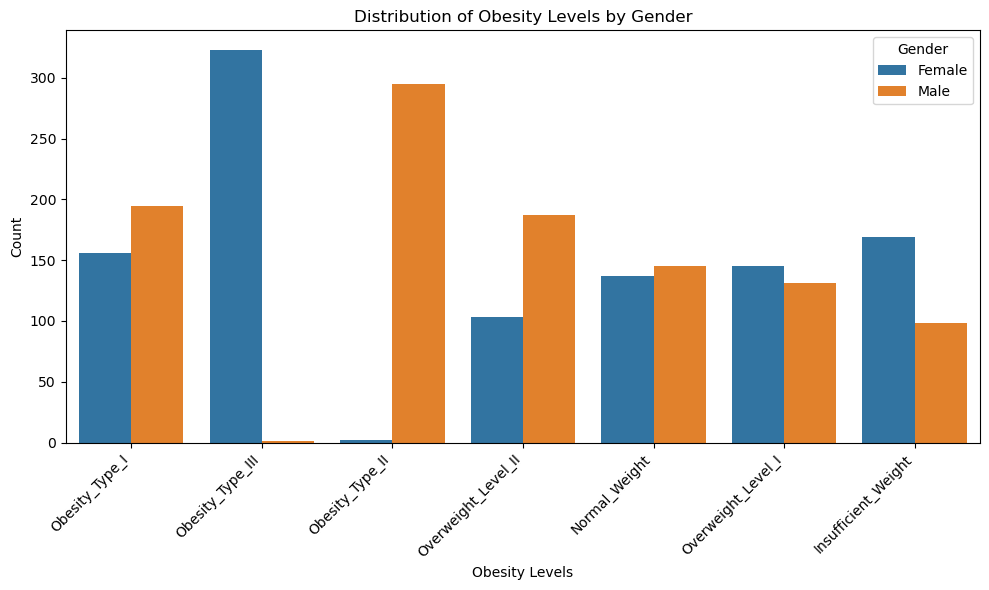

In [15]:
# Plotting the distribution of obesity levels by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='Gender', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribution of Obesity Levels by Gender')
plt.xlabel('Obesity Levels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [16]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'NObeyesdad':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


In [17]:

# Encode target variable
le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])



In [18]:
# Features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


In [19]:

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [21]:

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8851674641148325
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        53
           1       0.91      0.70      0.79        57
           2       0.92      0.93      0.92        70
           3       0.94      1.00      0.97        60
           4       1.00      0.98      0.99        65
           5       0.76      0.82      0.79        55
           6       0.80      0.74      0.77        58

    accuracy                           0.89       418
   macro avg       0.88      0.88      0.88       418
weighted avg       0.89      0.89      0.88       418



In [22]:

# Random Forest with GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200],
             'max_depth': [None, 10, 20],
             'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9497607655502392
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.82      0.95      0.88        57
           2       0.97      0.97      0.97        70
           3       1.00      1.00      1.00        60
           4       1.00      0.98      0.99        65
           5       0.91      0.89      0.90        55
           6       0.96      0.90      0.93        58

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [23]:

# SVM with GridSearchCV
svm = SVC()
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9641148325358851
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.98      0.95      0.96        57
           2       1.00      0.97      0.99        70
           3       0.95      1.00      0.98        60
           4       1.00      0.98      0.99        65
           5       0.94      0.89      0.92        55
           6       0.92      0.95      0.93        58

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [24]:

# Cross-validation scores
log_scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
rf_scores = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='accuracy')
svm_scores = cross_val_score(best_svm, X_scaled, y, cv=5, scoring='accuracy')


In [25]:

print("Logistic Regression CV Mean Accuracy:", np.mean(log_scores))
print("Random Forest CV Mean Accuracy:", np.mean(rf_scores))
print("SVM CV Mean Accuracy:", np.mean(svm_scores))

Logistic Regression CV Mean Accuracy: 0.8697290971050912
Random Forest CV Mean Accuracy: 0.9334698748178492
SVM CV Mean Accuracy: 0.9478090255068674
